Data shape: (1333, 13)
Columns: Index(['location_name', 'location_id', 'location_type', 'date', 'outcome_type',
       'value', 'geography', 'school_year', 'estimate_pct', 'population_size',
       'percent_surveyed', 'survey_type', 'categories'],
      dtype='object')
       location_name  location_id location_type        date  \
0    Adams, Colorado       8001.0        county  2025-08-13   
1    Adams, Colorado       8001.0        county  2025-08-15   
2    Adams, Colorado       8001.0        county  2025-08-28   
3  Allegan, Michigan      26005.0        county  2025-06-06   
4     Allen, Indiana      18003.0        county  2025-04-07   

         outcome_type  value geography school_year estimate_pct  \
0  case_lab-confirmed    1.0       NaN         NaN          NaN   
1  case_lab-confirmed    2.0       NaN         NaN          NaN   
2  case_lab-confirmed    1.0       NaN         NaN          NaN   
3  case_lab-confirmed    1.0       NaN         NaN          NaN   
4  case_lab-conf

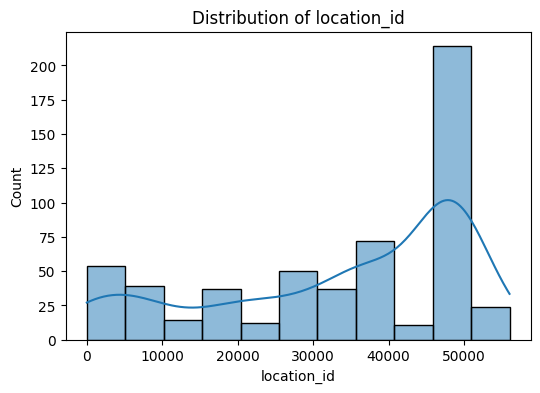

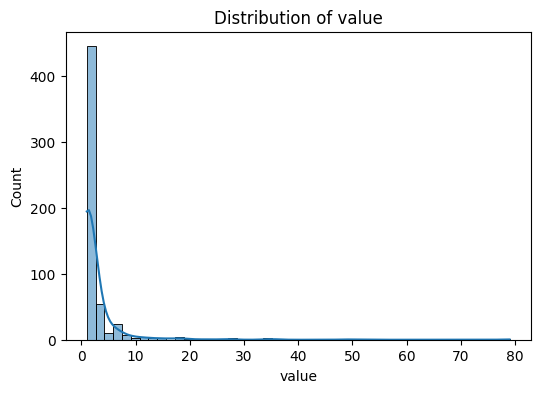

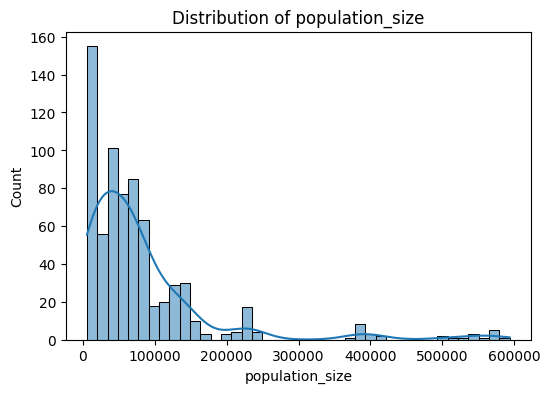

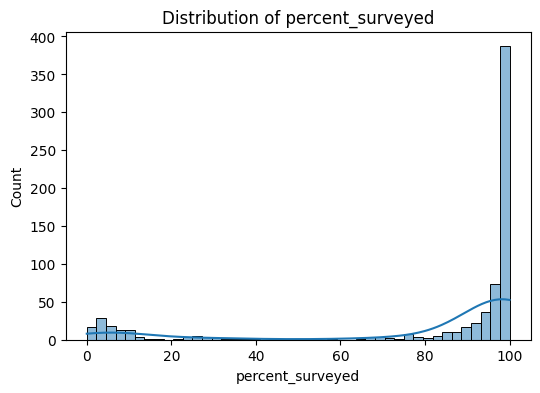

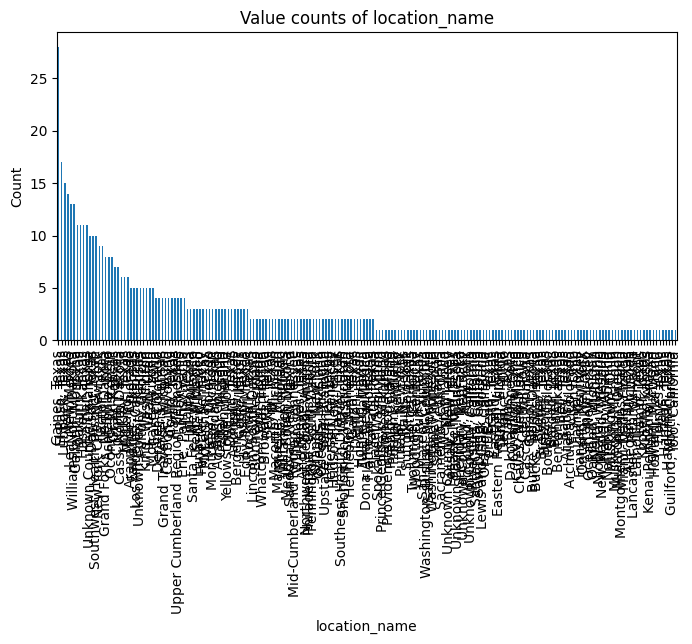

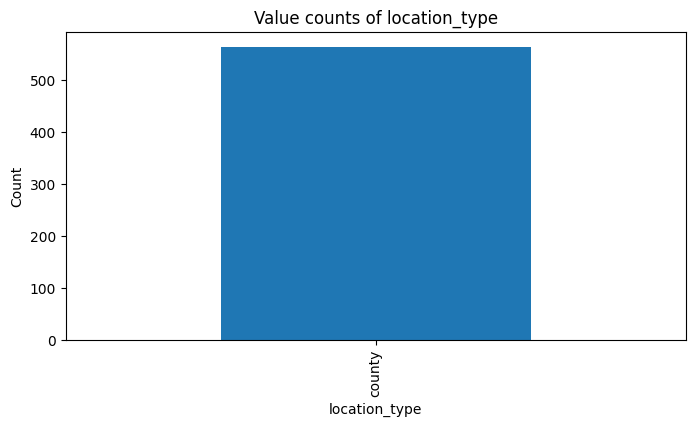

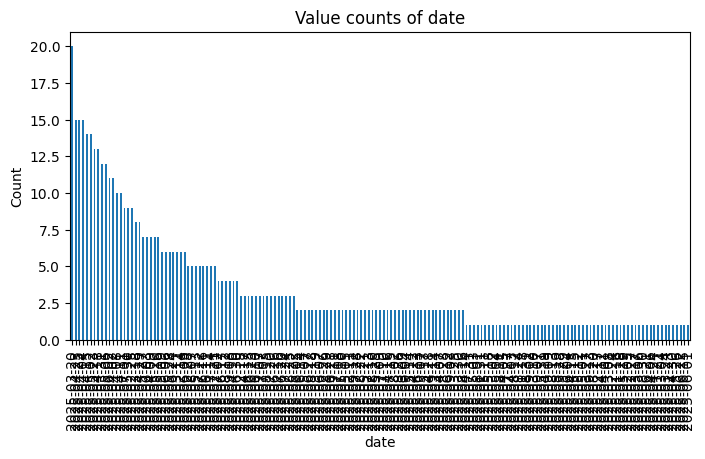

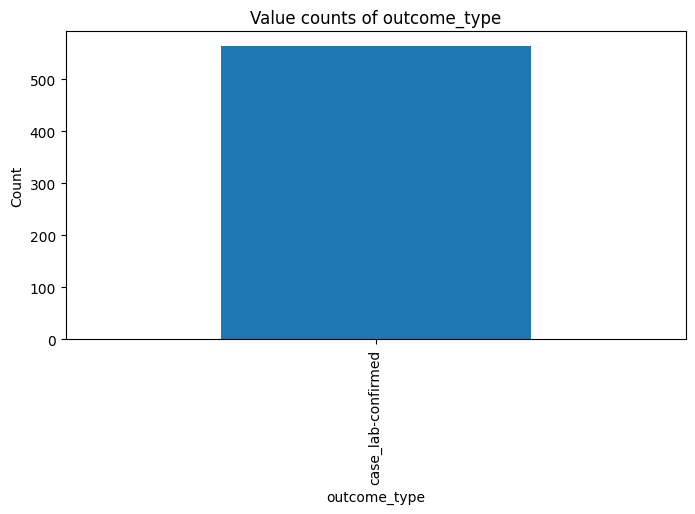

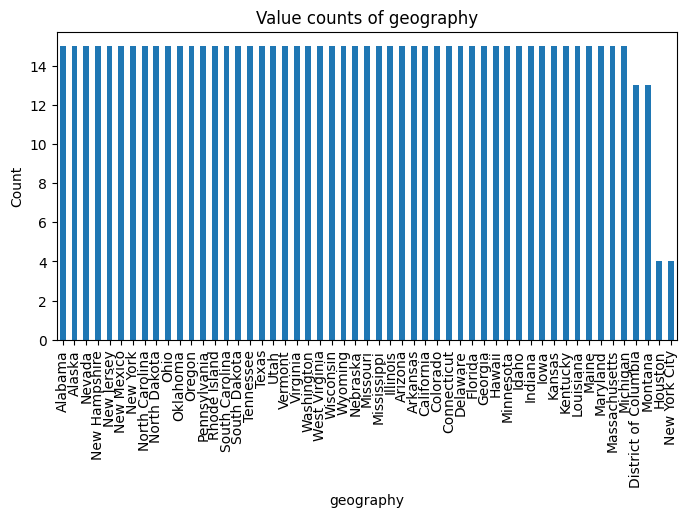

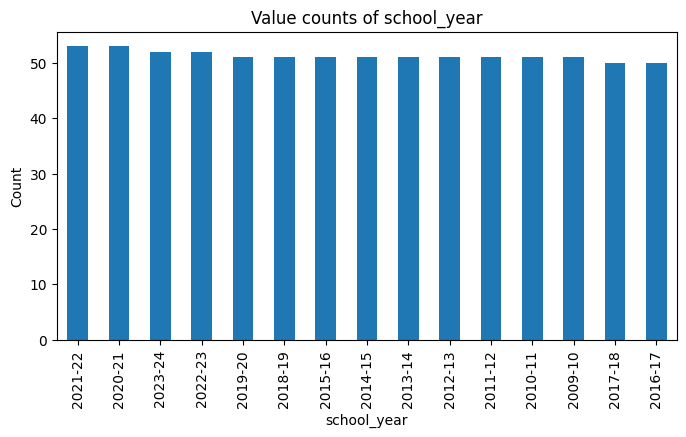

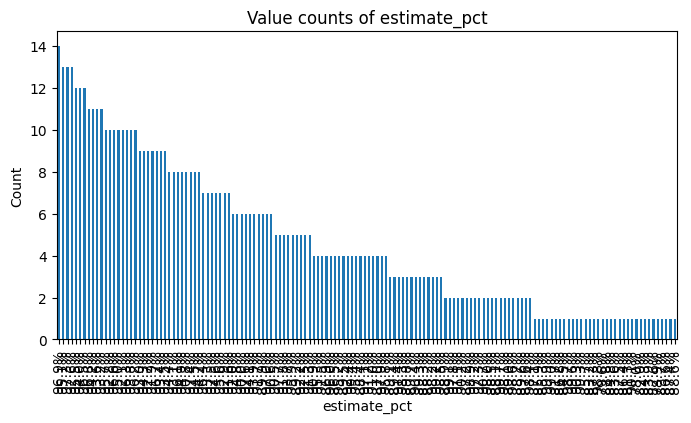

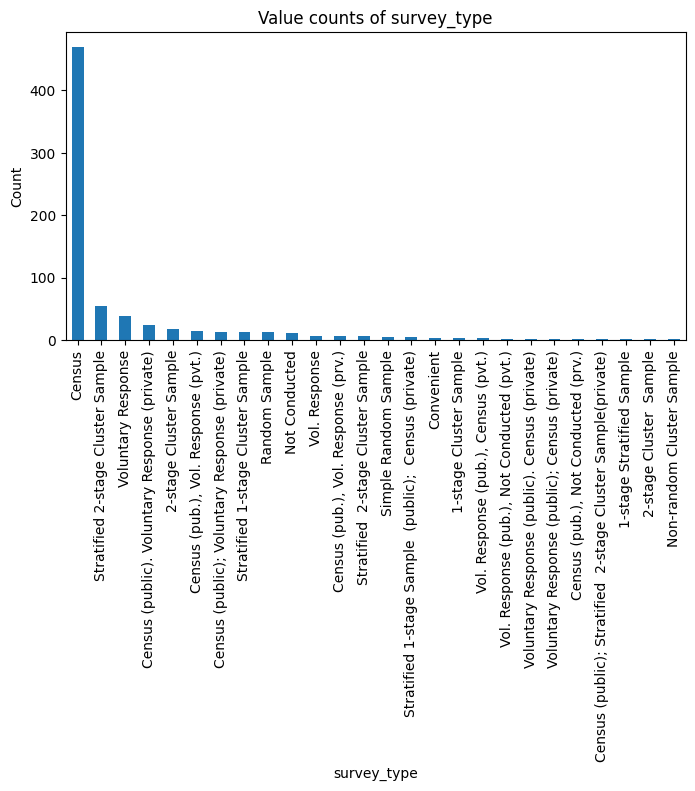

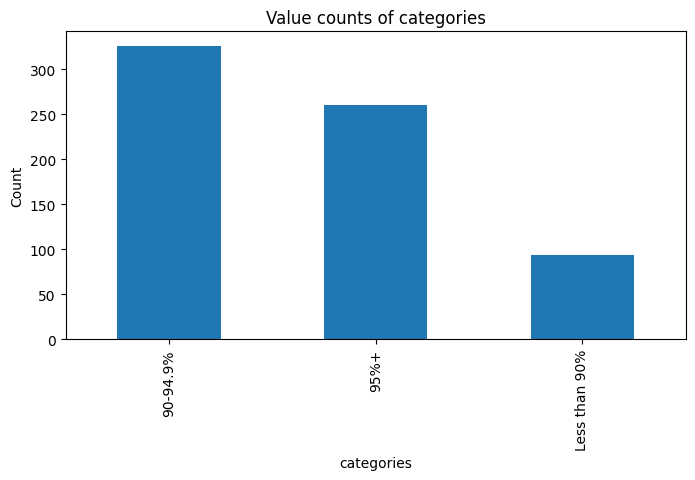

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load all CSV files from the directory
data_dir = '../data/processed/outbreak'
dfs = []
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_dir, file))
        dfs.append(df)

# Concatenate all dataframes
data = pd.concat(dfs, ignore_index=True)

# Display basic info
print("Data shape:", data.shape)
print("Columns:", data.columns)
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(data.describe(include='all'))

# Plot distributions for numeric columns
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot counts for categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Value counts of {col}')
    plt.ylabel('Count')
    plt.show()

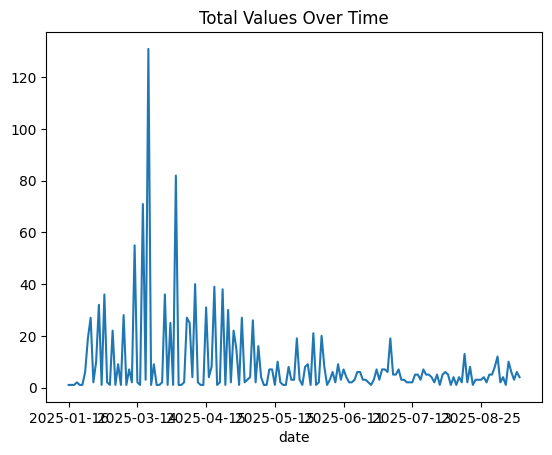

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/outbreak/measles_county_all_updates.csv")

df.groupby('date')['value'].sum().plot(title="Total Values Over Time")
plt.show()



/var/folders/4q/t8n9sjt12_3d174q7qjdcvv80000gn/T/ipykernel_95694/2681378895.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


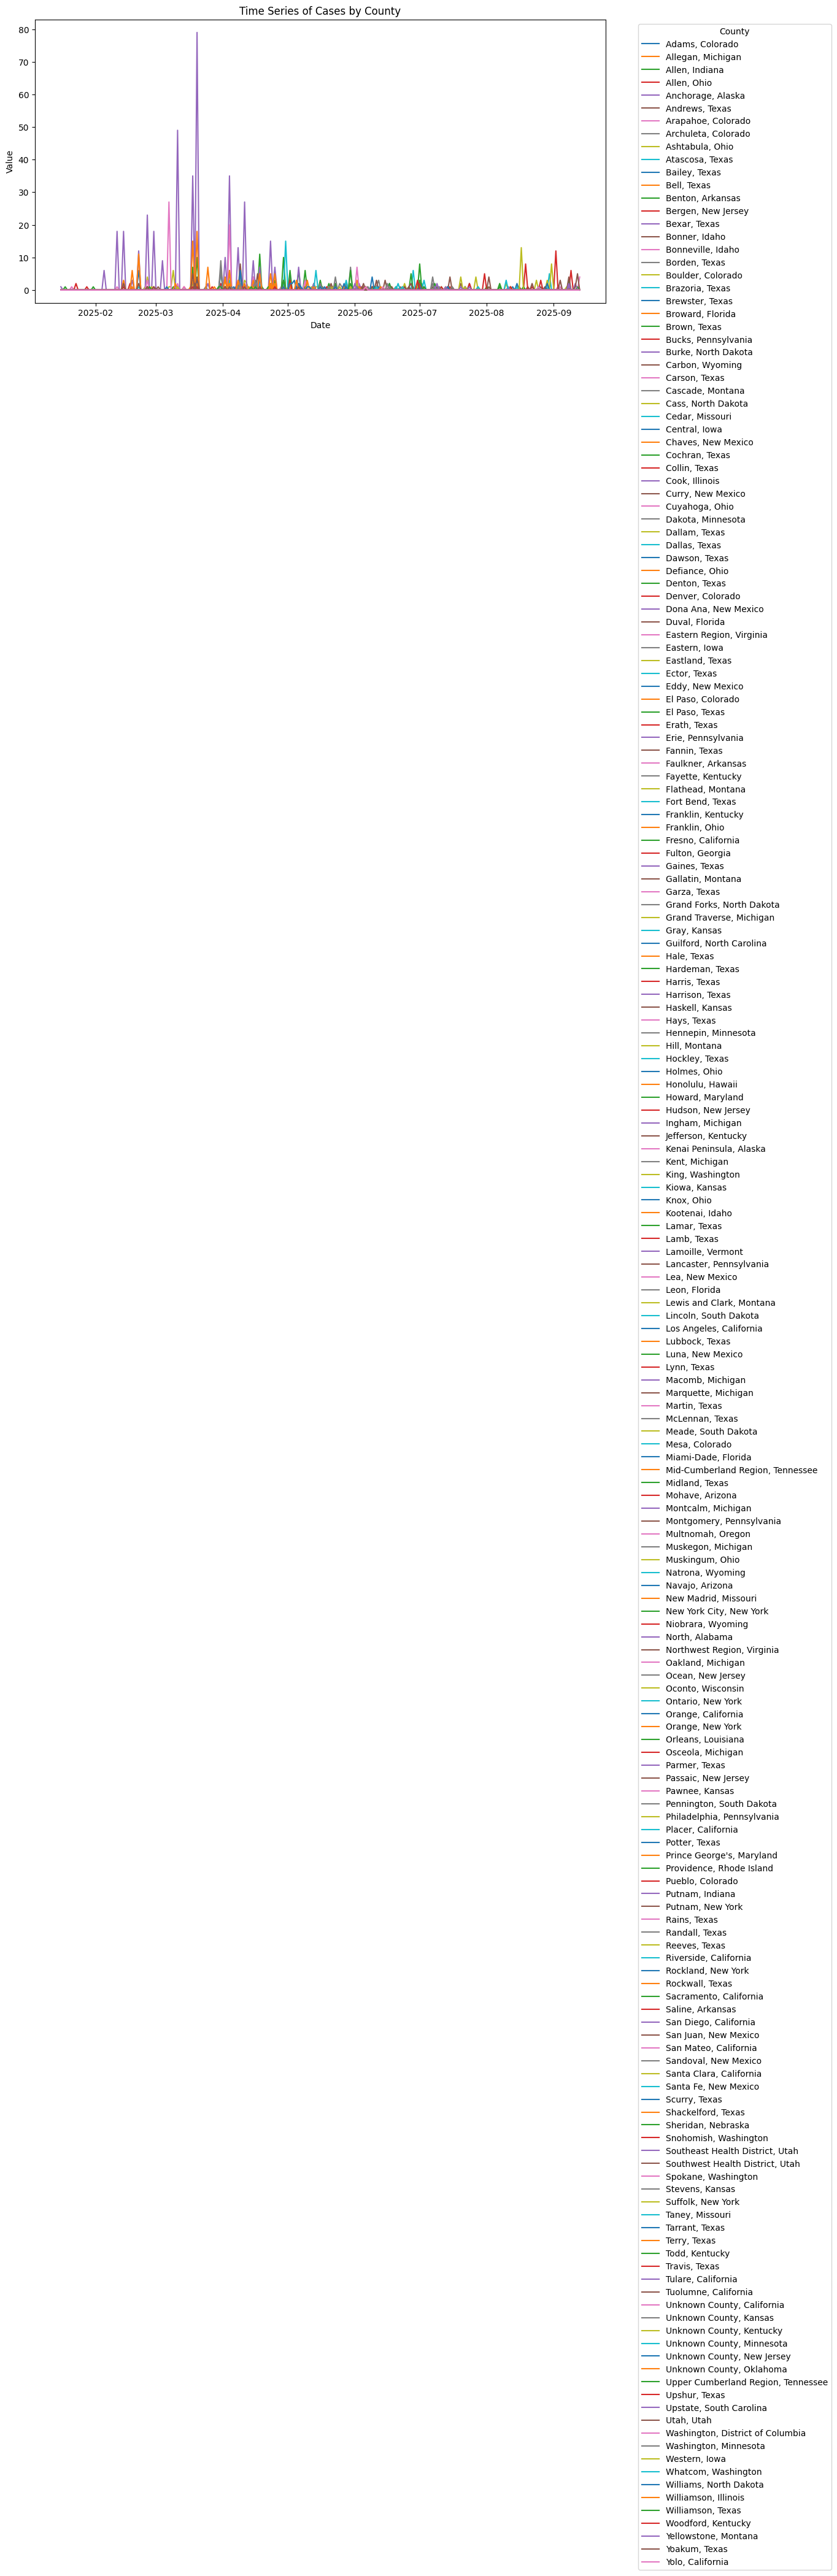

In [9]:
df['date'] = pd.to_datetime(df['date'])

# Group by location and date
df_grouped = df.groupby(['location_name', 'date'])['value'].sum().reset_index()

# Pivot for plotting
df_pivot = df_grouped.pivot(index='date', columns='location_name', values='value')

# Create full date range
full_range = pd.date_range(df['date'].min(), df['date'].max())

# Reindex so every county has values for every date
df_pivot = df_pivot.reindex(full_range).fillna(0)

# Plot
plt.figure(figsize=(12, 6))
for county in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[county], label=county)

plt.title("Time Series of Cases by County")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()